# Artificial Intelligence Nanodegree
## Convolutional Neural Networks
### Project: an Algorithm for a Dog Identification App¶

In [8]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import sys
import os
import dlib
from skimage import io
from tqdm import tqdm
from glob import glob
from sklearn.datasets import load_files
from extract_bottleneck_features import *
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.utils import np_utils
from IPython.core.display import Image, display

In [10]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('img/dogImages/train')
valid_files, valid_targets = load_dataset('img/dogImages/valid')
test_files, test_targets = load_dataset('img/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("img/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset
In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array human_files.

In [50]:
%matplotlib inline     

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/hf.xml')

random.seed(666)

# load filenames in shuffled human dataset
human_files = np.array(glob("img/lfw/*/*"))
#random.shuffle(human_files)

In [51]:

def boxe_face(image):
    # load color (BGR) image
    img = cv2.imread(image)
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find faces in image
    faces = face_cascade.detectMultiScale(gray)
    # print number of faces detected in the image
    print (faces)
    print('Number of faces detected:', len(faces))
    # get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()




[[ 71  70 109 109]]
Number of faces detected: 1


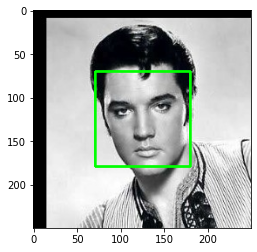

There are 13233 total human images.


In [52]:
boxe_face(human_files[3])

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))



## Step 1: Detect Humans
We use OpenCV's implementation of Haar feature-based cascade classifiers to detect human faces in images. OpenCV provides many pre-trained face detectors, stored as XML files on github. We have downloaded one of these detectors and stored it in the haarcascades directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Before using any of the face detectors, it is standard procedure to convert the images to grayscale. The detectMultiScale function executes the classifier stored in face_cascade and takes the grayscale image as a parameter.

In the above code, faces is a numpy array of detected faces, where each row corresponds to a detected face. Each detected face is a 1D array with four entries that specifies the bounding box of the detected face. The first two entries in the array (extracted in the above code as x and y) specify the horizontal and vertical positions of the top left corner of the bounding box. The last two entries in the array (extracted here as w and h) specify the width and height of the box.

### Write a Human Face Detector
We can use this procedure to write a function that returns True if a human face is detected in an image and False otherwise. This function, aptly named face_detector, takes a string-valued file path to an image as input and appears in the code block below.

In [53]:
# returns "True" if face is detected in image stored at img_path
def face_detector_opencv(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Assess the Human Face Detector
Question 1: Use the code cell below to test the performance of the face_detector function.

What percentage of the first 100 images in human_files have a detected human face?
What percentage of the first 100 images in dog_files have a detected human face?
Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face. You will see that our algorithm falls short of this goal, but still gives acceptable performance. We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays human_files_short and dog_files_short.

Answer: The OpenCV's implementation of Haar feature-based cascade classifiers detects 100.0% of faces in the first 100 images in human_files and 11.0% of faces in the first 100 images in dog_files. When investigating each image where a face has been detected, we can see that for one image there is actually a human in the picture so the classifier is not making a mistake here. For 4 images, the classifier misclassifies the face of a human with a dog. For the rest of them, the classifier seems to detect faces in fur, wrinkle of fabrics...

In [24]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def performance_face_detector_opencv(human_files_short, dog_files_short):

SyntaxError: unexpected EOF while parsing (<ipython-input-24-7e9af253ad7f>, line 7)